<a href="https://colab.research.google.com/github/SimenKlemp/Tensorflow/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 1**

In [19]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

RANDOM_SEED = 42
uploaded = files.upload()

Saving Admissions.csv to Admissions (3).csv


**Reading dataset**

In [20]:
data = pd.read_csv('Admissions.csv')

features = data[['gre', 'gpa', 'rank', 'admit']]

featuresScale = preprocessing.minmax_scale(features) 


**Encoding response variable data into one-hot**

In [21]:
labels_onehot_dataframe = pd.get_dummies(featuresScale[:, 3], prefix='admit')
one_hot = np.array(labels_onehot_dataframe)

##print(one_hot[0:25, :])
##print(one_hot[50:75, :])

**Split data into training and testing**

In [35]:
train_feats, test_feats, train_lab, test_lab = train_test_split(featuresScale[:, 0:3], one_hot, test_size=0.30, random_state=RANDOM_SEED)

##print(train_feats.shape)

##print(train_lab.shape)



(280, 3)
(280, 2)


 **Build Neural Network**

In [40]:
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Activation

feat_shape = train_feats.shape[1]

hidden_nodes = 5

out_shape = train_lab.shape[1]

model = Sequential()

model.add(Dense(hidden_nodes, activation='relu', input_dim=feat_shape))
model.add(Dense(out_shape, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 20        
                                                                 
 dense_3 (Dense)             (None, 2)                 12        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


**Training the model**

In [41]:
epochs = 20000
hist = model.fit(train_feats, train_lab, epochs=epochs, batch_size=128, verbose=1)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 4ms/step - loss: 0.5771
Epoch 17502/20000
3/3 [==============================] - 0s 3ms/step - loss: 0.5771
Epoch 17503/20000
3/3 [==============================] - 0s 5ms/step - loss: 0.5771
Epoch 17504/20000
3/3 [==============================] - 0s 3ms/step - loss: 0.5771
Epoch 17505/20000
3/3 [==============================] - 0s 7ms/step - loss: 0.5771
Epoch 17506/20000
3/3 [==============================] - 0s 2ms/step - loss: 0.5771
Epoch 17507/20000
3/3 [==============================] - 0s 2ms/step - loss: 0.5771
Epoch 17508/20000
3/3 [==============================] - 0s 2ms/step - loss: 0.5772
Epoch 17509/20000
3/3 [==============================] - 0s 4ms/step - loss: 0.5773
Epoch 17510/20000
3/3 [==============================] - 0s 2ms/step - loss: 0.5773
Epoch 17511/20000
3/3 [==============================] - 0s 2ms/step - loss: 0.5774
Epoch 17512/20000
3/3 [====================

**Plot the loss function**

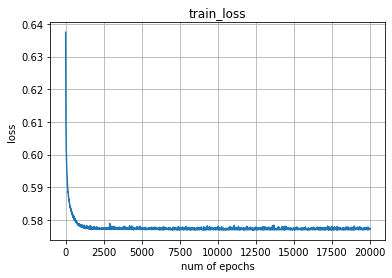

In [42]:
train_loss = hist.history['loss']
xc = range(epochs)
plt.plot(xc, train_loss)

plt.figure(1, figsize=(7.5))
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.style.use(['ggplot'])


**Print the values of all weights and bias**

In [53]:
for layerNum, layer in enumerate(model.layers):
  print("\n")
  print("Layer Number = ", layerNum)
  print("\n")
  print("Weight values = ")
  weights = layer.get_weights()[0]
  print(weights)
  print("\n")
  print("Bias values = ")
  biases = layer.get_weights()[1]
  print(biases)
  print("################################################")




Layer Number =  0


Weight values = 
[[-0.8334812   0.3047347   0.41551068  0.8758037   0.36552933]
 [ 0.2028901  -0.27679512  0.3034801   0.93907434  0.5113476 ]
 [-0.41120362  1.1053052  -0.74401265 -0.2758093   0.04439617]]


Bias values = 
[ 0.          0.49309796 -0.13936372 -0.11477618 -0.18947905]
################################################


Layer Number =  1


Weight values = 
[[ 0.41949463  0.67534804]
 [-0.04987753 -1.0306306 ]
 [-0.87942404 -0.31265128]
 [-0.951613   -0.02352477]
 [-0.99688154 -0.39373827]]


Bias values = 
[ 0.4910889  -0.49108857]
################################################


**Predict the outcome using test data**

In [54]:
pred = model.predict(test_feats)
pred_class = np.argmax(pred, axis=1)

observed = np.argmax(test_lab, axis=1)

cm = confusion_matrix(pred_class, observed)
print(cm)
print('Accuracy score: ', accuracy_score(pred_class, observed))

4/4 [==============================] - 0s 3ms/step
[[78 31]
 [ 3  8]]
Accuracy score:  0.7166666666666667
